In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

## Amostras aleatórias

In [2]:
# matriz a partir de uma sequência
A = np.arange(15).reshape(3, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
# dimensão
A.shape  

(3, 5)

In [4]:
# número de linhas 
A.shape[0]

3

In [5]:
# número de colunas
A.shape[1]

5

In [6]:
# número de elementos
A.size

15

### Matriz de dados $\boldsymbol{X}_{n \times p}$

Seja $\boldsymbol{X}_{4 \times 3} =
        \left[
        \begin{array}{rrr}
        7 & 3 & 9\\
        4 & 6 & 11 \\
        4 & 2 & 5 \\
        5 & 5 & 7\\
        \end{array}
        \right].$

In [7]:
# montar a matriz
X = np.array([[7, 3, 9], [4, 6, 11], [4, 2, 5], [5, 5, 7]])
print(X)

[[ 7  3  9]
 [ 4  6 11]
 [ 4  2  5]
 [ 5  5  7]]


In [8]:
# obter n
n = X.shape[0]
n

4

In [9]:
# obter p
p = X.shape[1]
p

3

Obter os vetores $\boldsymbol{X}_{1\cdot}$ $\boldsymbol{X}_{2\cdot}$, $\cdots$

In [10]:
X1p = X[0,:].reshape(3, 1)
X2p = X[1,:].reshape(3, 1)
X3p = X[2,:].reshape(3, 1)
X4p = X[3,:].reshape(3, 1)

Obter o vetor de médias: $\boldsymbol{\bar{X}}_{p \times 1}$

In [11]:
Xb = np.mean(X, axis=0).reshape(3, 1)
print(Xb)

[[ 5.]
 [ 4.]
 [ 8.]]


Matricialmente, o vetor de médias amostrais é otido por:

$\boldsymbol{\bar{X}}$ = $\dfrac{1}{n} (\boldsymbol{X}_{1\cdot} + \boldsymbol{X}_{2\cdot} + \dots + \boldsymbol{X}_{n\cdot})$

In [12]:
# matricialmente
(1 / n * (X1p + X2p + X3p + X4p)).reshape(3, 1)

array([[ 5.],
       [ 4.],
       [ 8.]])

Matriz de covariâncias amostrais: $\boldsymbol{S}_{p \times p}$

In [13]:
S = np.cov(X.T)
print(S)

[[ 2.         -0.66666667  0.66666667]
 [-0.66666667  3.33333333  3.33333333]
 [ 0.66666667  3.33333333  6.66666667]]


Matricialmente, a matriz de covariâncias é otida por:

$\boldsymbol{S} = \dfrac{1}{n-1} \displaystyle \sum_{i=1}^{n}(\boldsymbol{X}_{i\cdot} - \boldsymbol{\bar{X}})(\boldsymbol{X}_{i\cdot} - \boldsymbol{\bar{X}})^T$

In [14]:
# matricialmente
(1 / (n - 1)) * (((X1p - Xb) @ (X1p - Xb).T) + 
                 ((X2p - Xb) @ (X2p - Xb).T) + 
                 ((X3p - Xb) @ (X3p - Xb).T) + 
                 ((X4p - Xb) @ (X4p - Xb).T)) 

array([[ 2.        , -0.66666667,  0.66666667],
       [-0.66666667,  3.33333333,  3.33333333],
       [ 0.66666667,  3.33333333,  6.66666667]])

Matriz de somas de quadrados e produtos: $\boldsymbol{W}_{p \times p}$

In [15]:
W = (n - 1) * S
print(W)

[[  6.  -2.   2.]
 [ -2.  10.  10.]
 [  2.  10.  20.]]


Matriz de correlações amostrais:  $\boldsymbol{R}_{p \times p}$

In [16]:
R = np.corrcoef(X.T)
R

array([[ 1.        , -0.25819889,  0.18257419],
       [-0.25819889,  1.        ,  0.70710678],
       [ 0.18257419,  0.70710678,  1.        ]])

Matricialmente, definindo $\boldsymbol{D}$ = $diag(\boldsymbol{S})$ = $diag(S_{ii})$ e $\boldsymbol{D}^{-1/2} = diag(1/\sqrt{S_{ii}})$,

$\boldsymbol{R} = \boldsymbol{D}^{-1/2}\boldsymbol{S}\boldsymbol{D}^{-1/2}$

In [17]:
# D**{-1/2}
D12 = np.diag(1 / np.sqrt(np.diag(S)))
print(D12)

[[ 0.70710678  0.          0.        ]
 [ 0.          0.54772256  0.        ]
 [ 0.          0.          0.38729833]]


In [18]:
R = D12 @ S @ D12
print(R)

[[ 1.         -0.25819889  0.18257419]
 [-0.25819889  1.          0.70710678]
 [ 0.18257419  0.70710678  1.        ]]


#### Diagramas de dispersão

In [19]:
X[:,0]

array([7, 4, 4, 5])

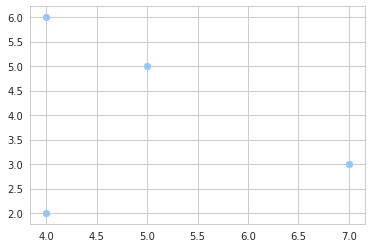

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

plt.scatter(X[:,0],X[:,1]);

### Ler um csv (dataframe)

In [21]:
import pandas as pd

In [22]:
# o arquivo '.csv' deve estar na mesma pasta em que este notebook esteja salvo
# se não estiver, o caminho deve ser colocado
medidas = pd.read_csv('medidas.csv')

In [23]:
medidas.head()

,torax,cintura,quadril,sexo
0,34,30,32,M
1,37,32,37,M
2,38,30,36,M
3,36,33,39,M
4,38,29,33,M


In [24]:
medidas.mean()

torax      37.00
cintura    28.00
quadril    37.05
dtype: float64

In [25]:
medidas.cov()

,torax,cintura,quadril
torax,6.631579,6.368421,3.000000
cintura,6.368421,12.526316,3.578947
quadril,3.000000,3.578947,5.944737


In [26]:
medidas.corr()

,torax,cintura,quadril
torax,1.000000,0.698734,0.477800
cintura,0.698734,1.000000,0.414741
quadril,0.477800,0.414741,1.000000


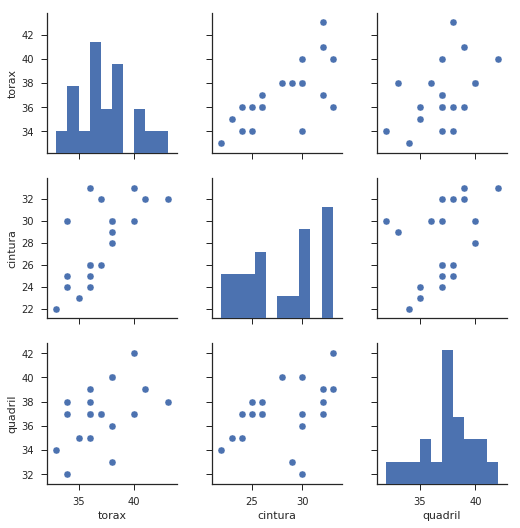

In [27]:
sns.set(style='ticks')
sns.pairplot(medidas);

### Transformando em matriz

In [28]:
# subselecionar variáveis e transformar em matriz
X = medidas.values[:, 0:3]
# mudar o tipo dos dados
X = np.asarray(X, dtype=float)

In [29]:
n = X.shape[0]

In [30]:
p = X.shape[1]

In [31]:
# vetor de médias
Xb = np.mean(X, axis=0)
print(Xb)

[ 37.    28.    37.05]


In [32]:
# matriz de covariâncias
S = np.cov(X.T)
print(S)

[[  6.63157895   6.36842105   3.        ]
 [  6.36842105  12.52631579   3.57894737]
 [  3.           3.57894737   5.94473684]]


In [33]:
# matriz de somas de quadrados e produtos
W = (n - 1) * S
print(W)

[[ 126.    121.     57.  ]
 [ 121.    238.     68.  ]
 [  57.     68.    112.95]]


In [34]:
# matriz de correlações
R = np.corrcoef(X.T)
R

array([[ 1.        ,  0.69873359,  0.47780035],
       [ 0.69873359,  1.        ,  0.41474133],
       [ 0.47780035,  0.41474133,  1.        ]])

In [35]:
# variância total: tr(S)
np.trace(S)

25.102631578947367

In [36]:
# ou
np.diag(S).sum()

25.102631578947367

In [37]:
# variância generalizada: |S|
np.linalg.det(S)

191.79904505029873

### Outro dataframe

In [38]:
mg = pd.read_csv('imrs.csv')
# selecionar microrregião de Varginha
vgn = mg.query('nome_micro == "Varginha"')

In [39]:
vgn.shape

(16, 42)

In [40]:
# zerar os índices
vgn = vgn.reset_index().drop('index', axis=1)

In [41]:
vgn.columns

Index(['ibge7', 'meso', 'nome_meso', 'micro', 'nome_micro', 'mun',
       'tx_mort_acid_15_29', 'tx_mort_hom_15_29', 'tx_mort_mama',
       'tx_mort_inf', 'existe_conselho_saude', 'tx_analf_25m', 'prop_fund_25m',
       'perc_med_25m', 'tx_med_adeq', 'tx_med_lab', 'existe_conselho_educ',
       'tx_crimes_pat', 'tx_crimes_pes', 'tx_hom', 'existe_uni_infra',
       'perc_energia', 'perc_banagua', 'perc_esgoto', 'perc_lixo', 'pop_total',
       'pop_masc', 'pop_fem', 'raz_dep', 'tx_urb', 'tx_fec', 'esp_vida',
       'rdpc', 'renocup', 'perc_rdpc_140', 'fam_pbf', 'tx_emp_form',
       'rend_pc_form', 'pib_pc', 'perc_agro', 'perc_serv', 'tx_ativ_18m'],
      dtype='object')

In [42]:
# pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html
# selecionar apenas as variáveis do tipo float
vgn.select_dtypes(include=['float64'])

,tx_mort_acid_15_29,tx_mort_hom_15_29,tx_mort_mama,tx_mort_inf,tx_analf_25m,prop_fund_25m,perc_med_25m,tx_med_adeq,tx_med_lab,tx_crimes_pat,...,esp_vida,rdpc,renocup,perc_rdpc_140,tx_emp_form,rend_pc_form,pib_pc,perc_agro,perc_serv,tx_ativ_18m
0,60.75,19.07,25.98,14.93,9.6,36.9,23.56,56.4,100.0,25.9,...,76.0,599.17,903.37,8.43,24.8,140.03,13127.48,28.65,39.28,64.92
1,25.91,0.00,13.03,6.21,9.8,39.3,27.33,39.9,79.6,19.4,...,76.0,686.16,1021.62,6.55,27.3,149.06,10611.67,33.56,29.17,70.14
2,0.00,32.32,17.71,26.09,12.5,34.7,23.05,53.5,100.0,61.0,...,75.0,472.71,709.35,8.82,18.5,105.89,7836.89,48.22,28.09,67.53
3,29.90,26.98,22.16,3.04,14.1,32.0,20.41,52.5,100.0,94.2,...,74.0,503.91,744.47,9.73,18.3,93.65,11985.82,57.93,25.34,70.96
4,32.41,0.00,0.00,33.11,12.4,33.4,22.15,34.9,100.0,8.4,...,73.0,525.35,822.31,9.56,27.7,133.98,11871.57,47.49,26.25,71.98
5,0.00,0.00,21.47,32.97,10.4,31.5,21.05,42.8,100.0,32.3,...,75.0,495.77,714.57,13.64,15.1,71.00,11402.89,53.59,24.72,66.81
6,31.99,15.38,7.85,16.08,14.0,36.9,21.83,43.0,100.0,31.7,...,75.0,577.50,921.97,10.46,25.0,155.01,13057.12,31.12,34.04,66.07
7,59.26,0.00,15.17,7.94,10.5,30.0,19.39,53.9,100.0,0.0,...,75.0,487.68,742.73,7.41,18.4,102.09,8945.31,43.65,27.00,66.59
8,0.00,65.00,17.77,7.14,11.8,31.0,17.42,49.0,100.0,26.1,...,75.0,500.79,784.59,6.93,28.5,156.11,9364.19,45.01,22.27,68.14
9,0.00,0.00,0.00,18.52,13.8,38.1,25.87,58.6,100.0,24.5,...,75.0,555.78,854.92,5.17,32.8,194.62,14457.20,40.17,22.52,71.95


In [43]:
# mudando o dataframe para ter só as variáveis float
vgn_num = vgn.select_dtypes(include=['float64'])

In [44]:
vgn_num.shape

(16, 29)

In [45]:
vgn_num.columns

Index(['tx_mort_acid_15_29', 'tx_mort_hom_15_29', 'tx_mort_mama',
       'tx_mort_inf', 'tx_analf_25m', 'prop_fund_25m', 'perc_med_25m',
       'tx_med_adeq', 'tx_med_lab', 'tx_crimes_pat', 'tx_crimes_pes', 'tx_hom',
       'perc_energia', 'perc_banagua', 'perc_esgoto', 'perc_lixo', 'raz_dep',
       'tx_urb', 'tx_fec', 'esp_vida', 'rdpc', 'renocup', 'perc_rdpc_140',
       'tx_emp_form', 'rend_pc_form', 'pib_pc', 'perc_agro', 'perc_serv',
       'tx_ativ_18m'],
      dtype='object')

In [48]:
# resumo estatístico das variáveis
vgn_num.describe()

,tx_mort_acid_15_29,tx_mort_hom_15_29,tx_mort_mama,tx_mort_inf,tx_analf_25m,prop_fund_25m,perc_med_25m,tx_med_adeq,tx_med_lab,tx_crimes_pat,...,esp_vida,rdpc,renocup,perc_rdpc_140,tx_emp_form,rend_pc_form,pib_pc,perc_agro,perc_serv,tx_ativ_18m
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,27.280625,11.981875,11.158750,16.220625,11.750000,37.212500,24.276250,49.425000,98.500000,39.375000,...,75.00000,573.880000,882.898750,8.488125,26.718750,159.219375,13465.450625,38.064375,29.558125,70.330000
std,25.975294,17.852220,9.129778,11.794622,2.826305,7.761862,6.846915,7.776846,5.079108,28.887887,...,1.21106,125.662088,202.959717,2.660088,9.002979,71.983144,6309.096176,15.364022,7.750161,3.727678
min,0.000000,0.000000,0.000000,0.000000,5.700000,29.700000,14.680000,34.900000,79.600000,0.000000,...,73.00000,428.330000,648.830000,3.830000,12.400000,71.000000,7836.890000,5.940000,18.190000,64.920000
25%,0.000000,0.000000,0.000000,6.907500,10.250000,31.875000,20.657500,42.950000,100.000000,23.825000,...,74.75000,493.747500,744.035000,6.812500,18.475000,104.940000,9286.887500,30.502500,25.185000,67.350000
50%,29.580000,3.050000,13.880000,14.665000,11.400000,35.400000,22.600000,51.700000,100.000000,29.650000,...,75.00000,539.525000,817.920000,8.625000,27.500000,145.780000,11928.695000,41.910000,27.175000,70.255000
75%,42.132500,19.260000,17.725000,26.147500,13.850000,38.400000,26.235000,54.525000,100.000000,50.350000,...,76.00000,619.915000,946.882500,9.625000,30.700000,184.075000,13898.600000,48.527500,34.122500,71.957500
max,81.900000,65.000000,25.980000,37.740000,16.800000,58.700000,42.080000,60.600000,100.000000,107.100000,...,77.00000,904.570000,1382.270000,13.640000,44.000000,344.560000,32144.450000,57.930000,46.410000,77.570000


In [46]:
# transformar em matriz pegando apenas algumas variáveis
variaveis = vgn_num.loc[:, ['esp_vida', 'rdpc', 'pib_pc']]
X = variaveis.values

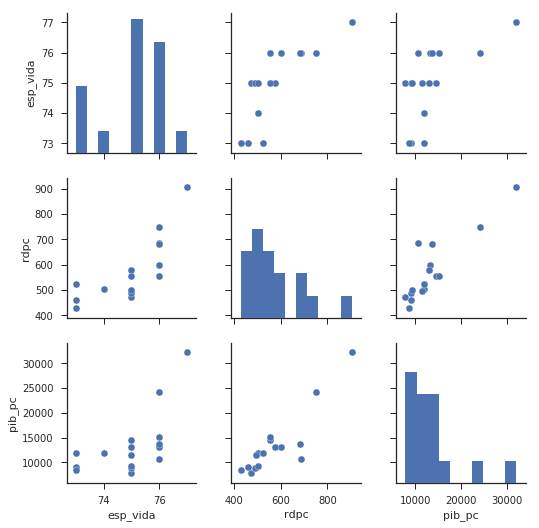

In [47]:
sns.set(style='ticks')
sns.pairplot(variaveis);